### Importação das bibliotecas

<b>Pandas</b> - Manipulação e Análise de Bases de Dados 

<b>Numpy</b> - Computação numérica

<b>Seaborn</b> - Plotagem de Gráficos e Visualização de Dados

<b>Matplotlib</b> - Configuração do ambiente de plotagem de gráficos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

<b>LinearRegression</b> - Regressor Linear para criação de um Baseline 

<b>sklearn.metrics</b>  - Métricas de avaliação de modelo MAE, MSE e R2

<b>KFold</b>            - Método de treinamento e avaliação dos modelos

<b>LabelEncoder</b>     - Método de Pré-processamento de variáveis categóricas

<b>Imputer</b>

<b>sqrt</b>             - Função do cálculo da Raiz Quadrada para geração da métrica RMSE

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from math import sqrt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def train_baseline(df):
    # Criando um novo DataFrame sem os exemplos com dados faltantes para treinamento do modelo baseline
    df_train = df.dropna()  

    # Verificando os atributos categóricos para transformação
    is_category = df_train.dtypes == 'object'
    cat_index = df_train.columns[is_category]

    # Transformação das colunas categóricas
    for cat in cat_index:
        df_train.loc[:, cat] = LabelEncoder().fit_transform(df_train.loc[:, cat])

    # Separação das variáveis preditoras e variável alvo
    X = df_train.drop('SalePrice', axis=1)   
    y = df_train['SalePrice'].values

    # Treinamento do modelo baseline
    kf = KFold(n_splits=10)

    kf.get_n_splits(X)

    mae = []
    rmse = []
    r2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)

        mae.append(mean_absolute_error(y_test, y_pred))
        rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
        r2.append(r2_score(y_test, y_pred))

    print('A média da métrica MAE foi de {}'.format(round(np.mean(mae), 2)))
    print('A média da métrica RMSE foi de {}'.format(round(np.mean(rmse), 2)))
    print('A média da métrica R2 foi de {}'.format(round(np.mean(r2), 4)))

In [5]:
df = pd.read_csv('dataset/train_clean_with_nan.csv', index_col='Id')

In [6]:
df.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,YearBuilt,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,2003,...,2003.0,RFn,2,TA,Y,0,61,WD,Normal,208500
2,20,RL,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,1976,...,1976.0,RFn,2,TA,Y,298,0,WD,Normal,181500
3,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,2001,...,2001.0,RFn,2,TA,Y,0,42,WD,Normal,223500
4,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,1915,...,1998.0,Unf,3,TA,Y,0,35,WD,Abnorml,140000
5,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,2000,...,2000.0,RFn,3,TA,Y,192,84,WD,Normal,250000


### Análise dos valores ausentes

In [7]:
isnull = df.isnull().sum()
isnull_index = [index for null, index in zip(isnull, isnull.index) if null > 0]

In [8]:
print('Os atributos que possuem dados ausentes são: ')
for col in isnull_index:
    print('-> ', col)

Os atributos que possuem dados ausentes são: 
->  MasVnrType
->  MasVnrArea
->  BsmtQual
->  BsmtCond
->  BsmtExposure
->  BsmtFinType1
->  BsmtFinType2
->  Electrical
->  GarageType
->  GarageYrBlt
->  GarageFinish
->  GarageQual


In [9]:
df[isnull_index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
dtypes: float64(2), object(10)
memory usage: 148.3+ KB


12 dos 47 atributos selecionados possuem dados faltantes, sendo 10 variáveis categóricas e 2 variáveis numéricas

### Análise dos atributos numéricos com dados faltantes

In [10]:
df[['MasVnrArea','GarageYrBlt']]

,MasVnrArea,GarageYrBlt
Id,,
1,196.0,2003.0
2,0.0,1976.0
3,162.0,2001.0
4,0.0,1998.0
5,350.0,2000.0
...,...,...
1456,0.0,1999.0
1457,119.0,1978.0
1458,0.0,1941.0


#### Análise dos dados faltantes do atributo MasVnrArea

<AxesSubplot:xlabel='MasVnrArea'>

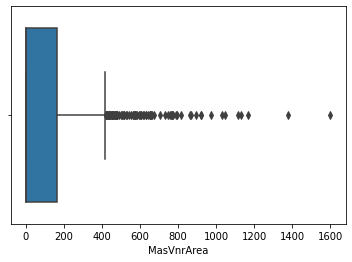

In [11]:
sns.boxplot(df['MasVnrArea'])

<AxesSubplot:xlabel='MasVnrArea'>

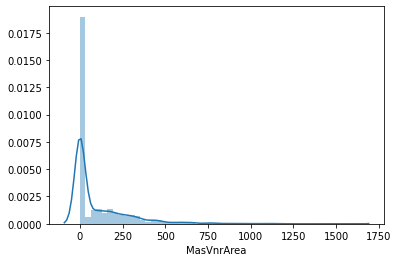

In [12]:
sns.distplot(df['MasVnrArea'])

In [13]:
df['MasVnrArea'].value_counts(bins=8)

(-1.601, 200.0]     1154
(200.0, 400.0]       198
(400.0, 600.0]        61
(600.0, 800.0]        25
(800.0, 1000.0]        7
(1000.0, 1200.0]       5
(1400.0, 1600.0]       1
(1200.0, 1400.0]       1
Name: MasVnrArea, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

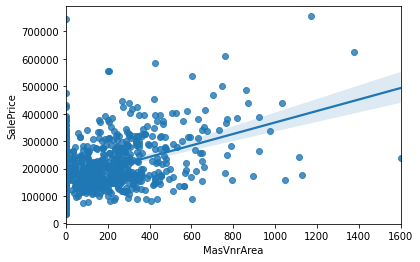

In [14]:
sns.regplot(x='MasVnrArea', y='SalePrice', data=df)

In [15]:
print('Há {} casas com folheamento em alvenaria, representando {}% dos exemplos.'.format(len(df[df['MasVnrArea'] > 0]),
                                                                                         round(len(df[df['MasVnrArea'] > 0]) / len(df) * 100),2))

Há 591 casas com folheamento em alvenaria, representando 40% dos exemplos.


In [16]:
df[['MasVnrArea','SalePrice']].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.477493
SalePrice,0.477493,1.000000


O atributo <i>MasVnrArea</i> possui uma grande concentração entre 0 e 200, o que indicaria um desbalanceamento, no entanto nos exemplos que possuem valores maiores que 0, essa característica tem um considerável impacto no valor de venda, tendo em vista a linha de regressão apresentada no gráfico de regressão. Assim, foi decidido manter essa variável e preencher o valores faltantes com 0, por ser o valor mais comum.

In [17]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
df['MasVnrArea'] = imputer.fit_transform(np.array(df['MasVnrArea']).reshape(-1, 1))

#### Análise dos dados faltantes do atributo GarageYrBlt

<AxesSubplot:xlabel='GarageYrBlt'>

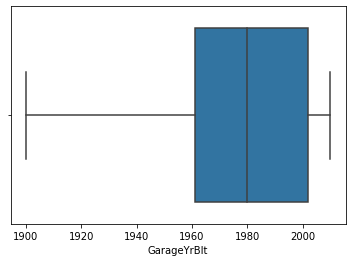

In [18]:
sns.boxplot(df['GarageYrBlt'])

<AxesSubplot:xlabel='GarageYrBlt'>

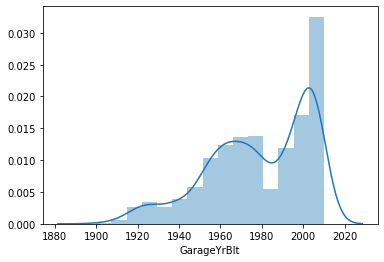

In [19]:
sns.distplot(df['GarageYrBlt'])

In [20]:
df['GarageYrBlt'].value_counts(bins=5)

(1988.0, 2010.0]                608
(1966.0, 1988.0]                327
(1944.0, 1966.0]                309
(1922.0, 1944.0]                 96
(1899.8890000000001, 1922.0]     39
Name: GarageYrBlt, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

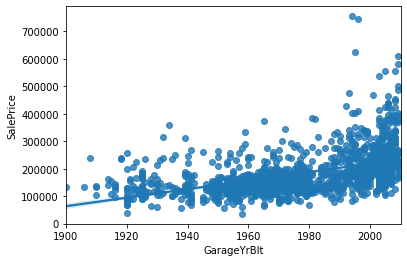

In [21]:
sns.regplot(x='GarageYrBlt', y='SalePrice', data=df)

In [22]:
print('Há {} valores ausentes no atributo GarageYrBlt.'.format(df['GarageYrBlt'].isnull().sum()))

Há 81 valores ausentes no atributo GarageYrBlt.


In [23]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [24]:
df[['GarageYrBlt','YearBuilt','YearRemodAdd']][df['YearBuilt'] != df['YearRemodAdd']]

,GarageYrBlt,YearBuilt,YearRemodAdd
Id,,,
3,2001.0,2001,2002
4,1998.0,1915,1970
6,1993.0,1993,1995
7,2004.0,2004,2005
9,1931.0,1931,1950
...,...,...,...
1455,2004.0,2004,2005
1456,1999.0,1999,2000
1457,1978.0,1978,1988


O atributo <i>GarageYrBlt</i> representa o ano em que a garagem da casa foi construída dessa forma foi decidido usar o atributo <i>YearBuilt</i> por ser o ano em que a casa foi construída como estratégia de preenchimento. O motivo por ser o ano em que a casa foi construída é que não há garantia de que caso a residência não tenha sido construída com garagem e tenha construído uma posteriormente, o ano seria o apresentado pelo atributo <i>YearRemodAdd</i>, há exemplos na base de dados em que o ano de remodelação da residência não equivale ao ano de construção da garagem mesmo a garagem não tendo sido construída inicialmente. Assim, é mais seguro preencher os valores ausentes com o atributo <i>YearBuilt</i>.

In [25]:
garage_isnull = df['GarageYrBlt'].isnull()
df['GarageYrBlt'] = [df.loc[index, 'GarageYrBlt']  if not(null) else df.loc[index, 'YearBuilt'] 
                                                   for null, index in zip(garage_isnull, garage_isnull.index)]

### Análise Dados faltantes para os atributos categóricos

In [26]:
isnull = df.isnull().sum()
isnull_index = [index for null, index in zip(isnull, isnull.index) if null > 0]

In [27]:
df[isnull_index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
 7   GarageType    1379 non-null   object
 8   GarageFinish  1379 non-null   object
 9   GarageQual    1379 non-null   object
dtypes: object(10)
memory usage: 165.5+ KB


In [28]:
for col in isnull_index:
    print(df[col].value_counts(dropna=False))

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: 

Para os atributos categóricos com elementos faltantes será preenchido com a categoria mais frequente, porém para evitar desbalanceamento entre valores e possível sobreajuste do modelo, o atributo <i>GarageFinish</i> será removido.

In [29]:
df = df.drop('GarageFinish', axis=1)

In [30]:
isnull_index.remove('GarageFinish')

In [31]:
for col in isnull_index:
    imputer = SimpleImputer(strategy='most_frequent')
    df[col] = imputer.fit_transform(np.array(df[col]).reshape(-1, 1))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Exterior1st    1460 non-null   object 
 12  MasVnrType     1460 non-null   object 
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   object 
 15  ExterCond      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtCond

In [33]:
train_baseline(df)

A média da métrica MAE foi de 20923.12
A média da métrica RMSE foi de 33136.72
A média da métrica R2 foi de 0.8196


In [34]:
df.to_csv('dataset/train_clean.csv')

Com o tratamento dos valores ausentes o modelo baseline obteve uma melhora significativa na métrica R2, portanto a qualidade do modelo e da base de dados foi melhorada.